In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [165]:
data = pd.read_csv("datasets/bank.csv", sep=";")

In [166]:
data.shape

(41188, 21)

In [167]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Valores de la variable dependiente
¿el cliente que llamaron se ha suscrito a un depósito a plazo (term deposit)?

In [168]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [169]:
y = pd.get_dummies(data['y'], columns = ['y'], prefix = ['y'], drop_first = True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Conversión de variable y a numérica

In [170]:
data["y"] = (data["y"]=="yes").astype(int)

In [171]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int32
dtypes: float64(5), int32(1), int64(5), object(10)
m

## Tratamiento de variables categóricas

In [173]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [174]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [175]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [176]:
data['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [177]:
data['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [178]:
data['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

Label enconder para las primeras 6 variables categóricas acerca de la información del cliente

In [179]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data['job']      = labelencoder_X.fit_transform(data['job']) 
data['marital']  = labelencoder_X.fit_transform(data['marital']) 
data['education']= labelencoder_X.fit_transform(data['education']) 
data['default']  = labelencoder_X.fit_transform(data['default']) 
data['housing']  = labelencoder_X.fit_transform(data['housing']) 
data['loan']     = labelencoder_X.fit_transform(data['loan']) 

In [180]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [182]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data['contact']     = labelencoder_X.fit_transform(data['contact']) 
data['month']       = labelencoder_X.fit_transform(data['month']) 
data['day_of_week'] = labelencoder_X.fit_transform(data['day_of_week']) 

In [183]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [184]:
data['duration'].min()

0

In [185]:
data['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [186]:
data['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [187]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [188]:
data.shape

(41188, 21)

In [189]:
data_vars = data.columns.values.tolist()

In [190]:
data_vars

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [191]:
dependent_variable = ['y']
independent_variables = [v for v in data_vars if v not in dependent_variable]

In [192]:
independent_variables

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [193]:
X = data[independent_variables]

In [194]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [195]:
Y = data[dependent_variable]

In [196]:
Y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [197]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [198]:
n = 19

In [199]:
lr = LogisticRegression()

In [200]:
rfe = RFE(lr, n)
rfe = rfe.fit(X, Y)

In [201]:
print(rfe.support_)

[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [202]:
print(rfe.ranking_)

[1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [203]:
bank_data_vars = data.columns.values.tolist()

In [204]:
z=zip(bank_data_vars,rfe.support_, rfe.ranking_)

In [205]:
listica = list(z)

In [206]:
listica

[('age', True, 1),
 ('job', False, 2),
 ('marital', True, 1),
 ('education', True, 1),
 ('default', True, 1),
 ('housing', True, 1),
 ('loan', True, 1),
 ('contact', True, 1),
 ('month', True, 1),
 ('day_of_week', True, 1),
 ('duration', True, 1),
 ('campaign', True, 1),
 ('pdays', True, 1),
 ('previous', True, 1),
 ('poutcome', True, 1),
 ('emp.var.rate', True, 1),
 ('cons.price.idx', True, 1),
 ('cons.conf.idx', True, 1),
 ('euribor3m', True, 1),
 ('nr.employed', True, 1)]

In [207]:
goodVariables = []
for i in listica:
    y = list(i)
    if y[1]: 
        goodVariables.append(y[0])

In [208]:
goodVariables

['age',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [209]:
if 'Loan Status' in goodVariables:
    goodVariables.remove('Loan Status')

In [210]:
X_reg = data[goodVariables]

In [211]:
n = 17

In [212]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200)

In [213]:
rfe = RFE(rfc, n)
rfe = rfe.fit(X, Y)

In [214]:
z=zip(bank_data_vars,rfe.support_, rfe.ranking_)

In [215]:
listica = list(z)

In [216]:
goodVariables = []
for i in listica:
    y = list(i)
    if y[1]: 
        goodVariables.append(y[0])

In [217]:
goodVariables

['age',
 'job',
 'marital',
 'education',
 'housing',
 'loan',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [218]:
if 'Loan Status' in goodVariables:
    goodVariables.remove('Loan Status')

In [219]:
X_rf = data[goodVariables]

In [220]:
n = 17

In [221]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()

In [222]:
rfe = RFE(gbk, n)
rfe = rfe.fit(X, Y)

In [223]:
z=zip(bank_data_vars,rfe.support_, rfe.ranking_)

In [224]:
listica = list(z)

In [225]:
goodVariables = []
for i in listica:
    y = list(i)
    if y[1]: 
        goodVariables.append(y[0])

In [226]:
goodVariables

['age',
 'job',
 'education',
 'default',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [227]:
if 'Loan Status' in goodVariables:
    goodVariables.remove('Loan Status')

In [228]:
X_gb = data[goodVariables]

In [229]:
from sklearn.model_selection import train_test_split
X_trainreg, X_testreg, y_trainreg, y_testreg = train_test_split(X_reg, Y, test_size = 0.20, random_state = 101)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 101)
X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split(X_rf, Y, test_size = 0.20, random_state = 101)
X_traingb, X_testgb, y_traingb, y_testgb = train_test_split(X_gb, Y, test_size = 0.20, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [230]:
from sklearn.preprocessing import StandardScaler
sc1_X = StandardScaler()
X_trainreg = sc1_X.fit_transform(X_trainreg)
X_testreg = sc1_X.transform(X_testreg)

sc2_X = StandardScaler()
X_trainrf = sc2_X.fit_transform(X_trainrf)
X_testrf = sc2_X.transform(X_testrf)

sc3_X = StandardScaler()
X_train = sc3_X.fit_transform(X_train)
X_test = sc3_X.transform(X_test)

sc4_X = StandardScaler()
X_traingb = sc4_X.fit_transform(X_traingb)
X_testgb = sc4_X.transform(X_testgb)

In [231]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_trainreg,y_trainreg)
logpred = logmodel.predict(X_testreg)


print(confusion_matrix(y_testreg, logpred))
print(accuracy_score(y_testreg, logpred)*100)
LOGCV = (cross_val_score(logmodel, X_trainreg, y_trainreg, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7083  196]
 [ 580  379]]
90.58023792182568


In [232]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7135  144]
 [ 658  301]]
90.0


In [233]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_trainrf, y_trainrf)
rfcpred = rfc.predict(X_testrf)

print(confusion_matrix(y_testrf, rfcpred ))
print(round(accuracy_score(y_testrf, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_trainrf, y_trainrf, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7010  269]
 [ 466  493]]
91.0


In [234]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_traingb, y_traingb)
gbkpred = gbk.predict(X_testgb)
print(confusion_matrix(y_testgb, gbkpred ))
print(round(accuracy_score(y_testgb, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_traingb, y_traingb, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7035  244]
 [ 459  500]]
91.0


## Comparativa de accuracy de los modelos

In [235]:
modelos = pd.DataFrame({
                'Modelo': ['Bosques aleatorios', 'KNN',
                           'Regresión logística','Gradient Boosting'],
                'Score':  [RFCCV, KNNCV, LOGCV, GBKCV]})

modelos.sort_values(by='Score', ascending=False)

,Modelo,Score
3,Gradient Boosting,0.918331
0,Bosques aleatorios,0.915023
2,Regresión logística,0.910440
1,KNN,0.904219


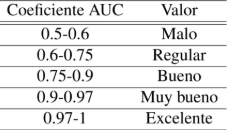

In [236]:
from IPython.display import display, Image
display(Image(filename='auc.png'))
## Sacado del libro Data science y redes 
## complejas: Métodos y aplicaciones

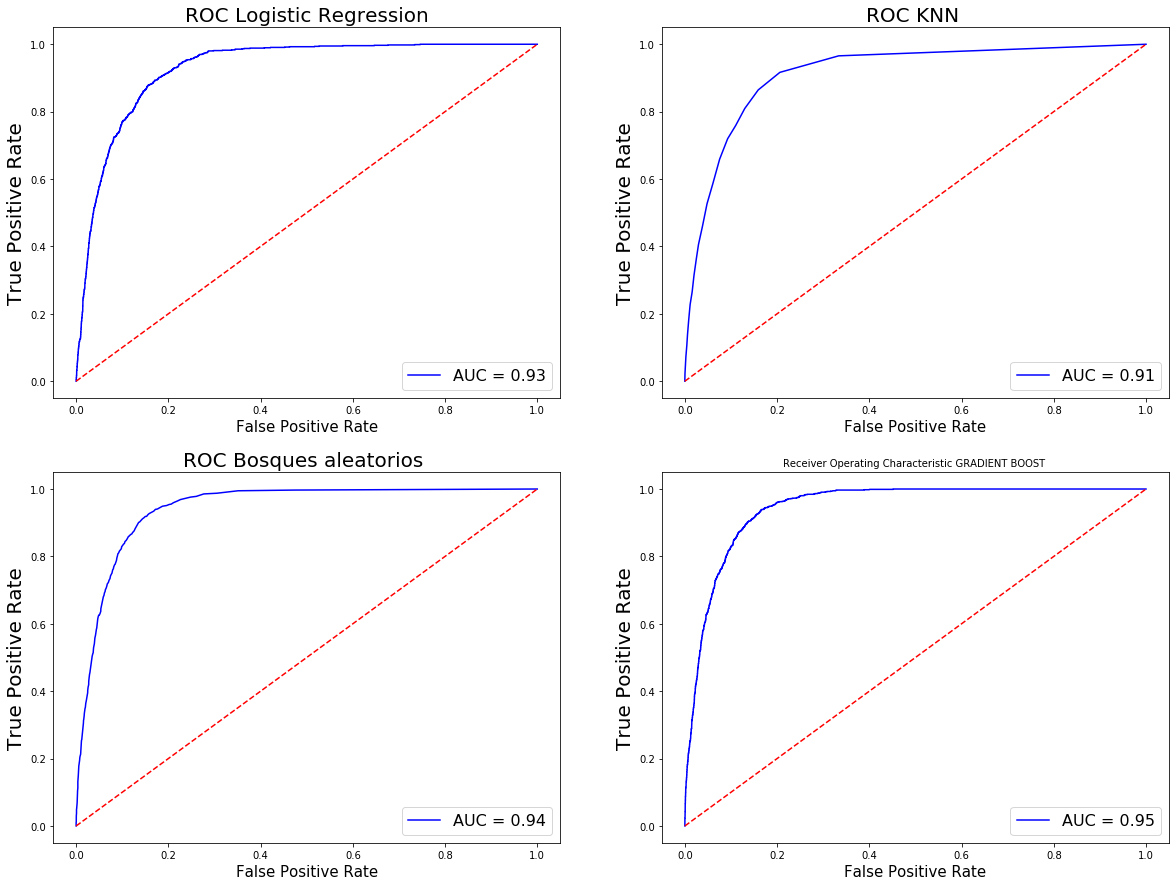

In [237]:
from sklearn import metrics
fig, ax_arr = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

# Regresión logística
probs = logmodel.predict_proba(X_testreg)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_testreg, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('ROC Logistic Regression',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

##KNN
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,1].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('ROC KNN ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

## Bosques aleatorios
probs = rfc.predict_proba(X_testrf)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_testrf, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[1,0].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('ROC Bosques aleatorios ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

## Gradient boost
probs = gbk.predict_proba(X_testgb)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_testgb, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax_arr[1,1].plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

En la matriz de confusión, los valores incorrectos son:
Falsos positivos: El cliente NO se suscribió al depósito a plazo pero el modelo dice que sí.
Falsos negativos: El cliente se suscribió al depósito a plazo pero el modelo dice que no.

In [238]:
from sklearn.metrics import classification_report

print('KNN Reports\n',classification_report(y_testreg, logpred))

KNN Reports
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7279
           1       0.66      0.40      0.49       959

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.72      8238
weighted avg       0.89      0.91      0.90      8238



In [239]:
from sklearn.metrics import classification_report
print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Reports
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7279
           1       0.68      0.31      0.43       959

    accuracy                           0.90      8238
   macro avg       0.80      0.65      0.69      8238
weighted avg       0.89      0.90      0.89      8238



In [240]:
from sklearn.metrics import classification_report
print('KNN Reports\n',classification_report(y_testrf, rfcpred))

KNN Reports
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7279
           1       0.65      0.51      0.57       959

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.90      0.91      0.91      8238



In [241]:
from sklearn.metrics import classification_report
print('KNN Reports\n',classification_report(y_testgb, gbkpred))

KNN Reports
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7279
           1       0.67      0.52      0.59       959

    accuracy                           0.91      8238
   macro avg       0.81      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238



## Mejor modelo: Gradient Boosting